<a href="https://colab.research.google.com/github/karmesh825/cs666student/blob/main/Final_CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

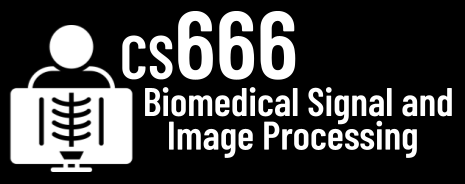
#Assignment 4

In [ ]:
# NAME: KARMESH SIDDHARAM CHAUDHARI

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using mahotas again, so lets install it!
!pip install mahotas --no-binary :all:

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: mahotas is being installed using the legacy 'setup.py install' method, because the '--no-binary' option was enabled for it and this currently disables local wheel building for projects that don't have a 'pyproject.toml' file. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion

In [3]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs666.org/data/xray/
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
#
# TODO: Upload xray.zip using the file panel on the left.

In [4]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [ ]:
NORMAL_DIR

'normal/'

In [5]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

(1858, 2090)


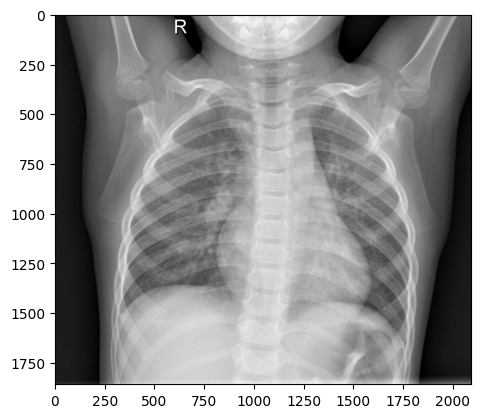

In [6]:
# TODO: Please display this image and print the dimensions!
# TODO: YOUR CODE
import matplotlib.pyplot as plt
import pylab as pl
print(img.shape)
#img = mh.colors.rgb2grey(img)
pl.imshow(img, cmap='gray')


#ANSWER : Dimensions -> (1858, 2090)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [7]:
import numpy as np
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [8]:
#loaded_image
#data[f_index]
data[f_index][ i, 0:img_shape[0], 0:img_shape[1]]

array([[  7.,   7.,   7., ...,   3.,   3.,   0.],
       [  7.,   7.,   7., ...,   3.,   3.,   0.],
       [  7.,   8.,   7., ...,   3.,   3.,   0.],
       ...,
       [ 82., 121.,  24., ...,  29.,  88.,   0.],
       [  5.,  88., 128., ...,  18.,  34.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [ ]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1)"os.listdir" to get the list of all files and 
#                    directories in the specified directory(here 'f') 
# TODO: Operation 2) "mh.imresize" to resize the given image
# TODO: Operation 3) The last line in this code assigns the loaded and processed 
#                    image to the numpy array "data".
#                    In a specific manner it sets the value of the pixel data in the
#                    numpy array "data" for the corresponding image index and position 
#                    in the array.

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

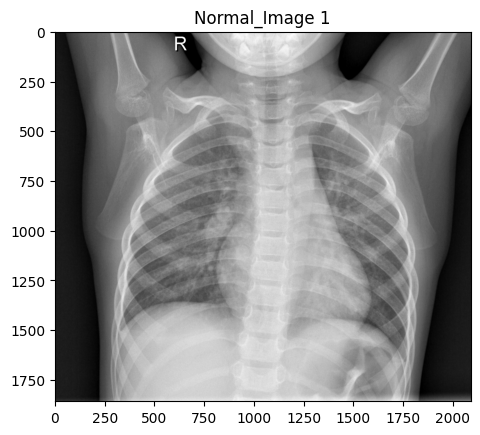

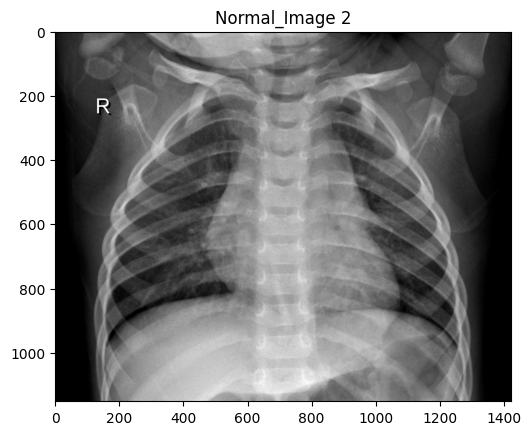

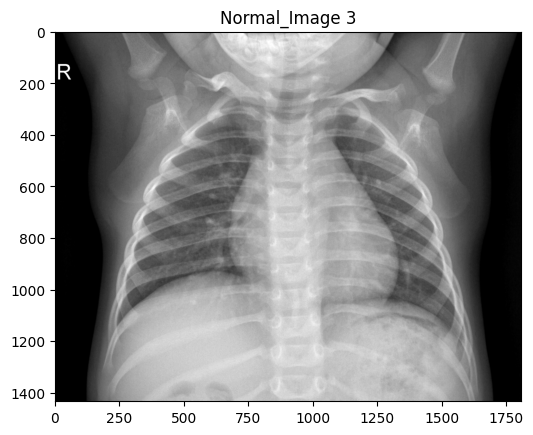

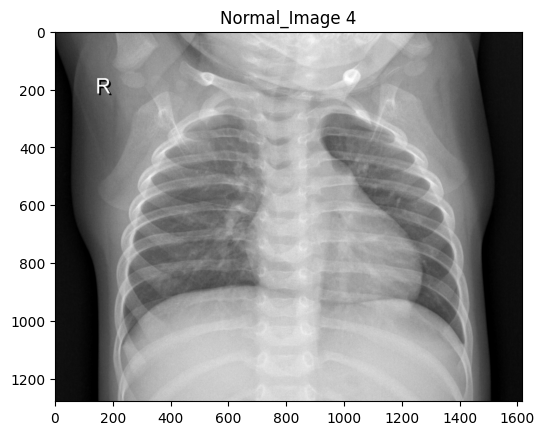

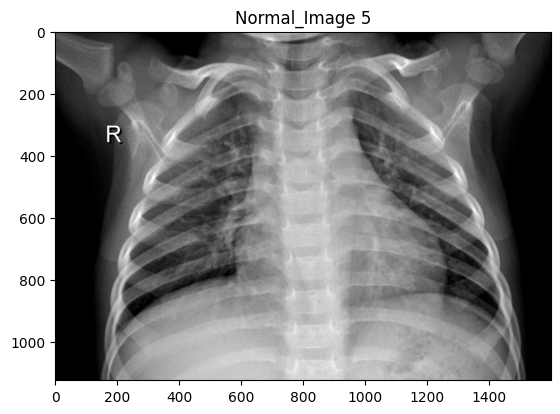

In [10]:
# ============  First 5 NORMAL_IMAGES =======================

path_n = "/content/normal/"
image_files = os.listdir(path_n)
image_files = sorted(image_files)


i = 0
for extension in image_files[0:5]:
  if str(extension).lower().endswith('.jpeg'):
    for normal in image_files :
      if i<5:
        img_file_path_n = os.path.join(path_n,normal)
        img = mh.imread(img_file_path_n)
        plt.imshow(img,cmap = 'gray')
        plt.title(f"Normal_Image {i+1}")
        plt.show()
        i = i+1
    
      
      
  

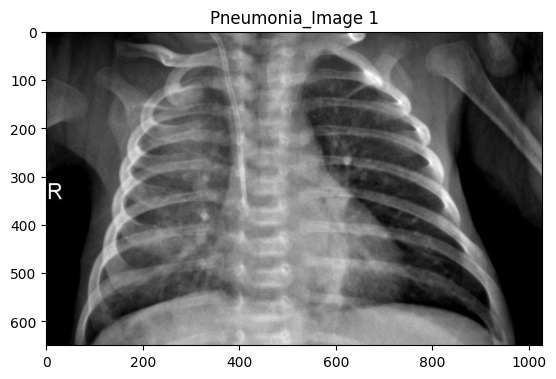

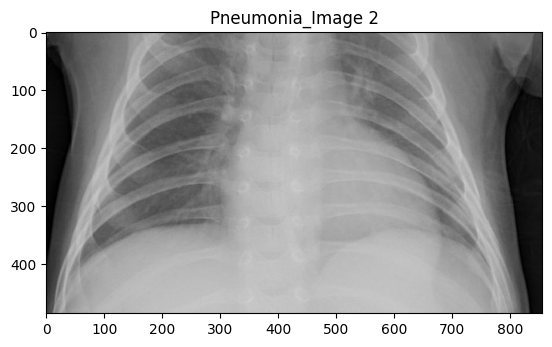

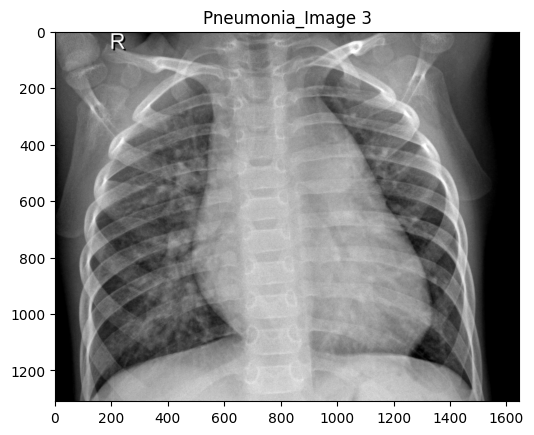

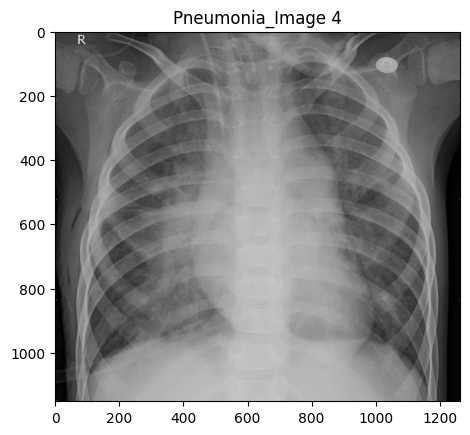

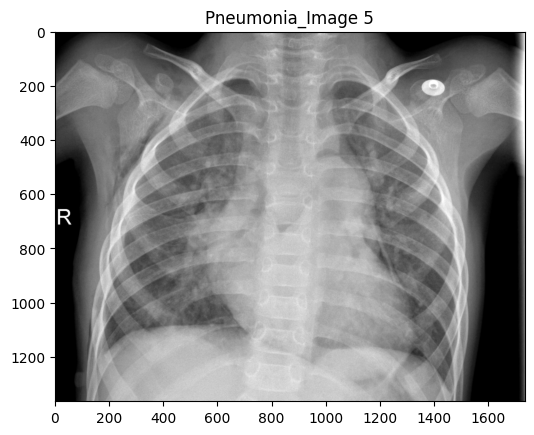

In [11]:
# ============  First 5 PNEUMONIA_IMAGES =======================

path_p = "/content/pneumonia/"
image_files = os.listdir(path_p)
image_files = sorted(image_files)

i = 0
for extension in image_files[0:5]:
  if str(extension).lower().endswith('.jpeg'):
    for pneumonia in image_files :
      if i<5:
        img_file_path_p = os.path.join(path_p,pneumonia)
        img = mh.imread(img_file_path_p)
        plt.imshow(img,cmap = 'gray')
        plt.title(f"Pneumonia_Image {i+1}")
        plt.show()
        i = i+1

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [12]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [13]:
# TODO: Please create the y_train vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
# TODO
TRAINING_COUNT = 60


y_train = np.empty(180,dtype =int)
print(len(y_train))
#print(y_train[0])


for i in range(0,180):
  if i<60:
    y_train[i] = 0
  elif i>=60 and i<120:
    y_train[i] = 1
  elif i>=120 and i<180:
    y_train[i] = 2


180


In [14]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [15]:
# TODO: Please create the y_test vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
# TODO
TESTING_COUNT = 40

y_test = np.concatenate((np.zeros(40), np.ones(40), np.full (40,2)), dtype=np.float32)
#y_test = (np.zeros(60), np.ones(60), np.full (60), dtype=int)
for j in range(0,120):
  if j<40:
    y_test[j] = 0
  elif j>=40 and j<80:
    y_test[j] = 1
  elif j>=80 and i<120:
    y_test[j] = 2




**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [16]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [17]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [18]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: The Random Forest works better for problems related to
#       regression(with some numerical target) and 
#       classification(based on classes/categories).
#       Any dataset that contains multiple data points and assuming that
#       each data point has a feature of itself.
#       So, in Random Forest multiple decision trees are created using subsets of data
#       their respective features.
#       Predictions could be made on the basis of frequency of features or based on the
#       average values of computations.
#       Basic Steps involve: 
#                -> Preprocessing data, 
#                -> Splitting data into Training/Testing
#                -> Training the model
#                -> Assessing model performance

In [ ]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: 1.0 seems to be a very good accuracy and according to me results are
#        not surprising because we are trained and tested on the same dataset
#        and specifically same data(images).

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER


In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER

In [ ]:
# =============== REFERENCES ===========================

#https://www.geeksforgeeks.org/python-os-listdir-method/

#https://www.askpython.com/python-modules/python-mahotas-for-image-processing

#https://theappsolutions.com/blog/development/data-wrangling-guide-to-data-preparation/#:~:text=Is%20Data%20Wrangling%3F-,Data%20Wrangling%20Definition,coherent%20whole%20for%20further%20processing.

#https://towardsdatascience.com/7-must-know-data-wrangling-operations-with-python-pandas-849438a90d15

#https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder

#https://mahotas.readthedocs.io/en/latest/

#IMAGES REQUIRED SORTING:
#https://stackoverflow.com/questions/33159106/sort-filenames-in-directory-in-ascending-order

#Random Forest Classification
#https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw